Simpact/MaxART: population density and health care facilities
=============================================================
In this examples, we're not going to run an actual simulation but we'll just let everything initialize to have coordinates for each person and facility. We'll then create a 2D map of the distribution of simulated persons, both for the Hhohho region and for Swaziland itself. In a final plot, we'll indicate the health care facilities and their positions on the Hhohho map as well.

In [1]:
%matplotlib inline
import pysimpactcyan
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
# First, we'll need to tell the Simpact simulation engine to use the MaxART-specific simulation
simpact = pysimpactcyan.PySimpactCyan()
simpact.setSimulationPrefix("maxart")

Setting data directory to /usr/local/share/simpact-cyan/


In [3]:
# In a first simulation, we'll just initialize the number of men and women to 150,000 each.
# Relationships are disabled by setting population.eyecap.fraction to 0, to speed up initialization
# and to reduce memory requirements, and the simulation is told to stop after one event. These
# settings will already allow us to plot a histogram of the simulated person positions, which
# should then resemble the population density from the Hhohho region.
cfg = { "population.nummen": 150000,
        "population.numwomen": 150000,
        "population.eyecap.fraction": 0,
        "population.maxevents": 1,
        "facilities.randomization": "${SIMPACT_DATA_DIR}/maxart-randomization-fake_1.csv" }
r = simpact.run(cfg, "/tmp/simptest")

Using identifier 'maxart-2016-10-16-18-23-33_8690_2HKibqwB-'
Results will be stored in directory '/tmp/simptest'
Running simpact executable...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 2028324209
# WARNING! Ignoring negative values when reading /usr/local/share/simpact-cyan/SWZ10adjv4.tif
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key facilities.geo.coords (config value is '/usr/local/share/simpact-cyan/maxart-facilities.csv')
# WARNING: ignoring consistency check for config key facilities.randomization (config value is '/usr/local/share/simpact-cyan//maxart-randomization-fake_1.csv')
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/usr/local/share/simpact-cyan/sa_2003.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 0.20.0rc1
# Current simulation time is 0
# Number of events executed is 1
# Started with 300000 people, 

/home/jori/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


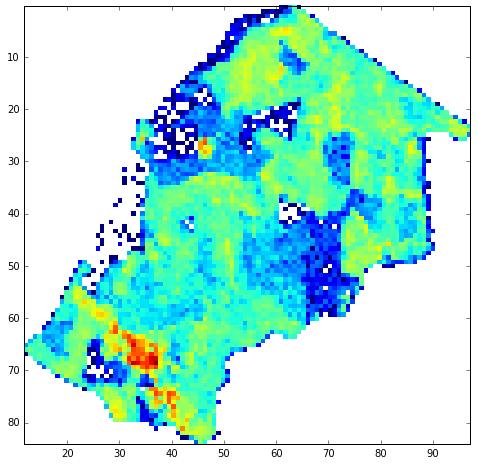

In [4]:
# We'll read the person log, and create a histogram of the X and Y positions of each person
persons = pd.read_csv(r["logpersons"])
plt.figure(1, figsize=(8,8))
plt.hist2d(persons["XCoord"], persons["YCoord"], bins=100, norm=matplotlib.colors.LogNorm());
plt.gca().set_aspect("equal")
plt.gca().invert_yaxis()

In [5]:
# In a second simulation, we'll do the same thing but we'll use person coordinates based on
# the full Swaziland population density information. In the 'person.geo' settings, the default
# is to use the Swaziland map, but by using a mask file only the Hhohho region is selected.
# To again obtain locations from the entire Swaziland country, this mask file is disabled in
# the settings below
cfg = { "population.nummen": 600000,
        "population.numwomen": 600000,
        "population.eyecap.fraction": 0,
        "population.maxevents": 1,
        "person.geo.dist2d.discrete.maskfile": "",
        "facilities.randomization": "${SIMPACT_DATA_DIR}/maxart-randomization-fake_1.csv"
      }
r = simpact.run(cfg, "/tmp/simptest")

Using identifier 'maxart-2016-10-16-18-23-42_8690_vMB01r3a-'
Results will be stored in directory '/tmp/simptest'
Running simpact executable...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 1343286928
# WARNING! Ignoring negative values when reading /usr/local/share/simpact-cyan/SWZ10adjv4.tif
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key facilities.geo.coords (config value is '/usr/local/share/simpact-cyan/maxart-facilities.csv')
# WARNING: ignoring consistency check for config key facilities.randomization (config value is '/usr/local/share/simpact-cyan//maxart-randomization-fake_1.csv')
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/usr/local/share/simpact-cyan/sa_2003.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 0.20.0rc1
# Current simulation time is 0
# Number of events executed is 1
# Started with 1200000 people,

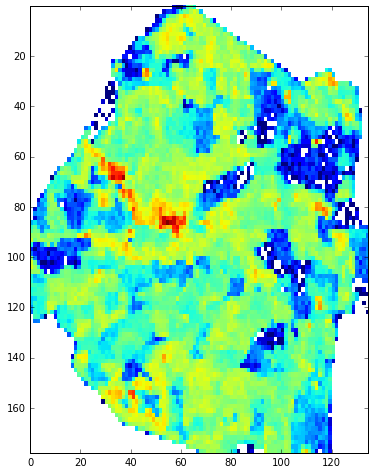

In [6]:
# Plotting a histogram of the person locations will now produce a density map that resembles
# the one from Swaziland
persons = pd.read_csv(r["logpersons"])
plt.figure(1, figsize=(8,8))
plt.hist2d(persons["XCoord"], persons["YCoord"], bins=100, norm=matplotlib.colors.LogNorm());
plt.gca().set_aspect("equal")
plt.gca().invert_yaxis()

In [7]:
# In a final simulation, we'll again use the same settings as the ones used to plot
# the Hhohho region above. We'll also specify that the facility GPS coordinates, translated
# such map coordinates, should be written to a file.
cfg = { "population.nummen": 150000,
        "population.numwomen": 150000,
        "population.eyecap.fraction": 0,
        "population.maxevents": 1,
        "facilities.outfile.facilityxypos": "${SIMPACT_OUTPUT_PREFIX}facilitypositions.csv"  ,
        "facilities.randomization": "${SIMPACT_DATA_DIR}/maxart-randomization-fake_1.csv"
      }
r = simpact.run(cfg, "/tmp/simptest")

Using identifier 'maxart-2016-10-16-18-24-18_8690_4xZhA0Rv-'
Results will be stored in directory '/tmp/simptest'
Running simpact executable...
Done.

# read seed from /dev/urandom
# Rng engine mt19937
# Using seed 1859039539
# WARNING! Ignoring negative values when reading /usr/local/share/simpact-cyan/SWZ10adjv4.tif
# Performing extra check on read configuration parameters
# WARNING: ignoring consistency check for config key facilities.geo.coords (config value is '/usr/local/share/simpact-cyan/maxart-facilities.csv')
# WARNING: ignoring consistency check for config key facilities.randomization (config value is '/usr/local/share/simpact-cyan//maxart-randomization-fake_1.csv')
# WARNING: ignoring consistency check for config key population.agedistfile (config value is '/usr/local/share/simpact-cyan/sa_2003.csv')
# mNRM: using advanced algorithm
# Release version
# Simpact version is: 0.20.0rc1
# Current simulation time is 0
# Number of events executed is 1
# Started with 300000 people, 

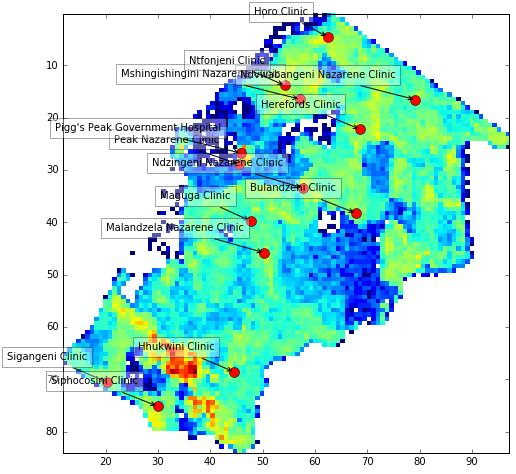

In [8]:
# We'll again create a histogram of the X and Y positions of each person, and on this
# map we'll indicate the locations of the health care facilities used in the MaxART study
# by using red circles. 
# In a final step, we'll also draw labels for these facilities

facPos = pd.read_csv(r["facilityxypos"])
persons = pd.read_csv(r["logpersons"])
plt.figure(1, figsize=(8,8))
plt.hist2d(persons["XCoord"], persons["YCoord"], bins=100, norm=matplotlib.colors.LogNorm());
plt.plot(facPos["XCoord"], facPos["YCoord"], 'o', color='red', markersize=10)
plt.gca().set_aspect("equal")
plt.gca().invert_yaxis()

# Let's add some labels
for label, x, y in zip(facPos["Facility name"], facPos["XCoord"], facPos["YCoord"]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'square,pad=0.5', fc = 'white', alpha = 0.35),
        arrowprops = dict(arrowstyle = '->')
    )